Race Results columns: Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps',
       'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time'],
      dtype='object')
Qualifying Results columns: Index(['Track', 'Position', 'No', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps'], dtype='object')
Simple Linear Regression
Coefficient: 0.7465
Intercept: 1.9986


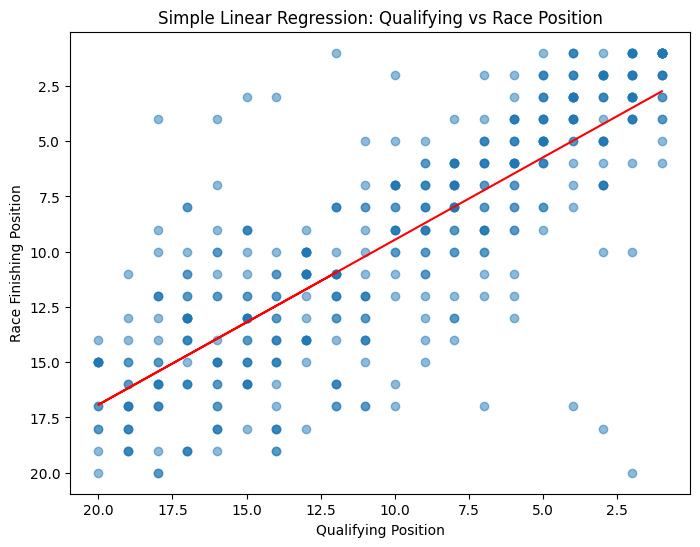


Multiple Linear Regression
Intercept: 5.0664
Number of coefficients: 33
Mean Squared Error: 7.7834
R^2 Score: 0.7205


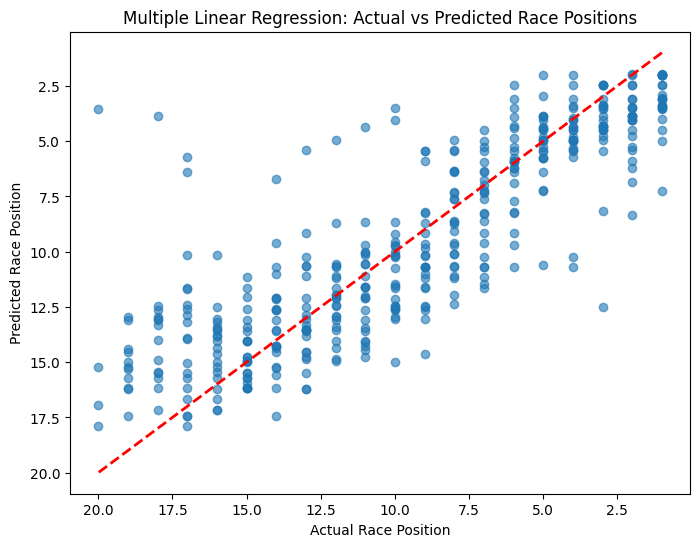

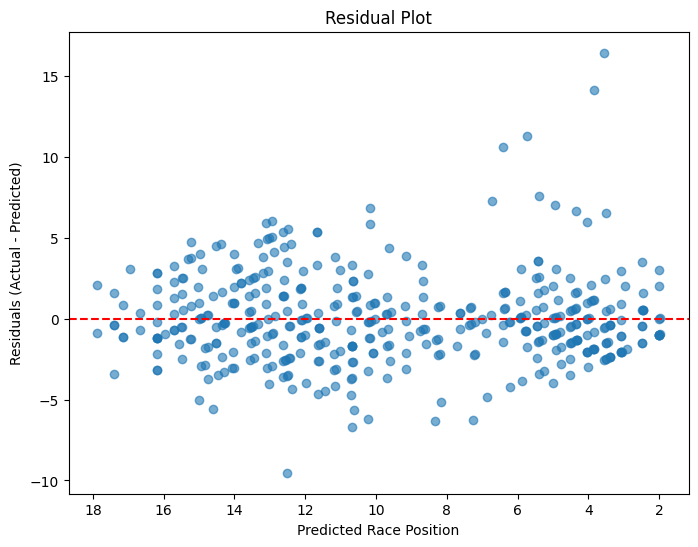

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


season2024RaceResults = pd.read_csv('Formula1_2024season_raceResults.csv')
season2024QualifyingResults = pd.read_csv('Formula1_2024season_qualifyingResults.csv')


print("Race Results columns:", season2024RaceResults.columns)
print("Qualifying Results columns:", season2024QualifyingResults.columns)

df = pd.merge(season2024RaceResults,
              season2024QualifyingResults[['Track', 'Driver', 'Position']],
              on=['Track', 'Driver'],
              suffixes=('_Race', '_Quali'))


df.rename(columns={'Position_Race': 'RacePosition', 'Position_Quali': 'QualifyingPosition'}, inplace=True)
df = df.dropna(subset=['RacePosition', 'QualifyingPosition'])

# Convert positions to numeric if needed (some datasets might have 'DNF' or 'NC' as strings)
df['RacePosition'] = pd.to_numeric(df['RacePosition'], errors='coerce')
df['QualifyingPosition'] = pd.to_numeric(df['QualifyingPosition'], errors='coerce')
df = df.dropna(subset=['RacePosition', 'QualifyingPosition'])

# SIMPLE LINEAR REGRESSION
X_simple = df[['QualifyingPosition']].values
y_simple = df['RacePosition'].values

model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

print("Simple Linear Regression")
print(f"Coefficient: {model_simple.coef_[0]:.4f}")
print(f"Intercept: {model_simple.intercept_:.4f}")

y_pred_simple = model_simple.predict(X_simple)

plt.figure(figsize=(8,6))
plt.scatter(X_simple, y_simple, alpha=0.5)
plt.plot(X_simple, y_pred_simple, color='red')
plt.xlabel('Qualifying Position')
plt.ylabel('Race Finishing Position')
plt.title('Simple Linear Regression: Qualifying vs Race Position')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

# MULTIPLE LINEAR REGRESSION (with Team and Driver)
df_encoded = pd.get_dummies(df, columns=['Team', 'Driver'], drop_first=True)
feature_cols = ['QualifyingPosition'] + \
               [col for col in df_encoded.columns if col.startswith('Team_') or col.startswith('Driver_')]

X_multi = df_encoded[feature_cols].values
y_multi = df_encoded['RacePosition'].values

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

print("\nMultiple Linear Regression")
print(f"Intercept: {model_multi.intercept_:.4f}")
print(f"Number of coefficients: {len(model_multi.coef_)}")

# Predictions and evaluation
y_pred_multi = model_multi.predict(X_multi)
mse = mean_squared_error(y_multi, y_pred_multi)
r2 = r2_score(y_multi, y_pred_multi)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
plt.figure(figsize=(8,6))
plt.scatter(y_multi, y_pred_multi, alpha=0.6)
plt.plot([min(y_multi), max(y_multi)], [min(y_multi), max(y_multi)], 'r--', linewidth=2)
plt.xlabel('Actual Race Position')
plt.ylabel('Predicted Race Position')
plt.title('Multiple Linear Regression: Actual vs Predicted Race Positions')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
residuals = y_multi - y_pred_multi

plt.figure(figsize=(8,6))
plt.scatter(y_pred_multi, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Race Position')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.gca().invert_xaxis()
plt.show()

# https://github.com/toUpperCase78/formula1-datasets/blob/master/Formula1_2024season_teams.csv